# **INFO5731 Assignment 2**

In this assignment, you will work on gathering text data from an open data source via web scraping or API. Following this, you will need to clean the text data and perform syntactic analysis on the data. Follow the instructions carefully and design well-structured Python programs to address each question.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

* **Make sure to submit the cleaned data CSV in the comment section - 10 points**

**Total points**: 100

**Deadline**: Wednesday, at 11:59 PM.

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


# Question 1 (40 points)

Write a python program to collect text data from **either of the following sources** and save the data into a **csv file:**

(1) Collect all the customer reviews of a product (you can choose any porduct) on amazon. [atleast 1000 reviews]

(2) Collect the top 1000 User Reviews of a movie recently in 2023 or 2024 (you can choose any movie) from IMDB. [If one movie doesn't have sufficient reviews, collect reviews of atleast 2 or 3 movies]

(3) Collect all the reviews of the top 1000 most popular software from G2 or Capterra.

(4) Collect the **abstracts** of the top 10000 research papers by using the query "machine learning", "data science", "artifical intelligence", or "information extraction" from Semantic Scholar.

(5) Collect all the information of the 904 narrators in the Densho Digital Repository.


In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

product_url = input("Enter the URL of the product on Amazon: ")

num_reviews = int(input("Enter the number of reviews to scrape: "))

reviews = []

page = 1
while len(reviews) < num_reviews:
    response = requests.get(f"{product_url} & pageNumber={page}")
    soup = BeautifulSoup(response.content, "html.parser")

    review_elements = soup.find_all("div", class_="a-section review aok-relative")

    for review_element in review_elements:
        review_text = review_element.find("span", class_="a-size-base review-text").text.strip()
        reviews.append(review_text)

    page += 1

df = pd.DataFrame({"review": reviews})

df.to_csv("amazon_reviews.csv", index=False)

Enter the URL of the product on Amazon: https://www.amazon.com/Razer-Ultimate-Hyperspeed-Lightest-Wireless/dp/B07YPC3BQC/ref=pd_ci_mcx_mh_mcx_views_0?pd_rd_w=w2aX7&content-id=amzn1.sym.225b4624-972d-4629-9040-f1bf9923dd95%3Aamzn1.symc.40e6a10e-cbc4-4fa5-81e3-4435ff64d03b&pf_rd_p=225b4624-972d-4629-9040-f1bf9923dd95&pf_rd_r=P5VS15G8J4XGAZ3943W6&pd_rd_wg=Ux7YE&pd_rd_r=64a3d3f4-1ec8-45c1-ba4c-348df5a2e545&pd_rd_i=B07YPC3BQC&th=1
Enter the number of reviews to scrape: 20


In [41]:
df.head()

,review
0,"I’ve purchased many Razer products, and from m..."
1,This mouse has multiple DPI settings which are...
2,he Razer Viper Ultimate Hyperspeed Wireless Ga...
3,"I’ve purchased many Razer products, and from m..."
4,This mouse has multiple DPI settings which are...


# Question 2 (30 points)

Write a python program to **clean the text data** you collected in the previous question and save the clean data in a new column in the csv file. The data cleaning steps include: [Code and output is required for each part]

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the stopwords list.

(4) Lowercase all texts

(5) Stemming.

(6) Lemmatization.

In [42]:
import string
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
stopWordsCache = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def remove_noise(s):
  result =  s.translate(str.maketrans('', '', string.punctuation))
  return result.replace("\n", "")

def remove_numbers(s):
  return ''.join([i for i in s if not i.isdigit()])

def remove_stopWords(s):
  return ' '.join([word for word in s.split() if word not in stopWordsCache])

def lowercase_words(s):
  return s.lower()

def stemming(s):
  return [stemmer.stem(word) for word in s.split()]

def lemmatization(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

df['cleaned_data'] = df['review'].apply(remove_noise).apply(remove_numbers).apply(remove_stopWords).apply(lowercase_words).apply(stemming).apply(lemmatization)
df.to_csv('cleaned_data.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Question 3 (30 points)

Write a python program to **conduct syntax and structure analysis of the clean text** you just saved above. The syntax and structure analysis includes:

(1) **Parts of Speech (POS) Tagging:** Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) **Constituency Parsing and Dependency Parsing:** print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) **Named Entity Recognition:** Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

In [43]:
nltk.download('averaged_perceptron_tagger')

df['parts_of_speech_tag'] = df['cleaned_data'].apply(lambda x: nltk.pos_tag(x))

count_dict = {
    'nouns' : 0,
    'verbs' : 0,
    'adjectives' : 0,
    'adverbs' : 0
}

def calculate_parts_of_speech_tags(tags):
  for tag in tags:
    words = tag[0]
    pos = tag[1]

    if(pos.startswith("N")):
      count_dict['nouns'] += 1
    if(pos.startswith("V")):
      count_dict['verbs'] += 1
    if(pos.startswith("J")):
      count_dict['adjectives'] += 1
    if(pos.startswith("RB")):
      count_dict['adverbs'] += 1

df['parts_of_speech_tag'].apply(calculate_parts_of_speech_tags)
print("-- Total numbe of Parts Of Speech --")
print(count_dict)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


-- Total numbe of Parts Of Speech --
{'nouns': 1995, 'verbs': 518, 'adjectives': 840, 'adverbs': 112}


In [44]:
!pip install benepar
import benepar, spacy
import en_core_web_sm
benepar.download('benepar_en3')
nlp = en_core_web_sm.load()
nlp.add_pipe('benepar', config={'model': 'benepar_en3'})

def constituency_parser(s):
  doc = nlp('The time for action is now. It is never too late to do something.')
  sent = list(doc.sents)[0]
  return sent._.parse_string

df['constituency_tree'] = df['cleaned_data'].apply(lambda x: ' '.join(x)).apply(constituency_parser)
df.head()

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/distributions/distribution.py:53: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


,review,cleaned_data,parts_of_speech_tag,constituency_tree
0,"I’ve purchased many Razer products, and from m...","[i’v, purchas, mani, razer, product, experi, r...","[(i’v, NN), (purchas, NN), (mani, NN), (razer,...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
1,This mouse has multiple DPI settings which are...,"[thi, mous, multipl, dpi, set, changeabl, thru...","[(thi, RB), (mous, JJ), (multipl, NNS), (dpi, ...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
2,he Razer Viper Ultimate Hyperspeed Wireless Ga...,"[razer, viper, ultim, hyperspe, wireless, game...","[(razer, NN), (viper, IN), (ultim, JJ), (hyper...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
3,"I’ve purchased many Razer products, and from m...","[i’v, purchas, mani, razer, product, experi, r...","[(i’v, NN), (purchas, NN), (mani, NN), (razer,...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
4,This mouse has multiple DPI settings which are...,"[thi, mous, multipl, dpi, set, changeabl, thru...","[(thi, RB), (mous, JJ), (multipl, NNS), (dpi, ...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...


In [45]:
def dependency_parser(s):
  doc = nlp(s)
  tree_dict = {}
  for token in doc:
    tree_dict[token] = {
        'relation' : str(token.dep_),
        'head' : str(token.head.text),
        'children' : str([child for child in token.children])
    }
  return tree_dict

df['dependency_tree'] = df['cleaned_data'].apply(lambda x: ' '.join(x)).apply(dependency_parser)
df.head()

/usr/local/lib/python3.10/dist-packages/torch/distributions/distribution.py:53: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


,review,cleaned_data,parts_of_speech_tag,constituency_tree,dependency_tree
0,"I’ve purchased many Razer products, and from m...","[i’v, purchas, mani, razer, product, experi, r...","[(i’v, NN), (purchas, NN), (mani, NN), (razer,...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{i’v: {'relation': 'compound', 'head': 'purcha..."
1,This mouse has multiple DPI settings which are...,"[thi, mous, multipl, dpi, set, changeabl, thru...","[(thi, RB), (mous, JJ), (multipl, NNS), (dpi, ...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{thi: {'relation': 'ROOT', 'head': 'thi', 'chi..."
2,he Razer Viper Ultimate Hyperspeed Wireless Ga...,"[razer, viper, ultim, hyperspe, wireless, game...","[(razer, NN), (viper, IN), (ultim, JJ), (hyper...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{razer: {'relation': 'compound', 'head': 'ulti..."
3,"I’ve purchased many Razer products, and from m...","[i’v, purchas, mani, razer, product, experi, r...","[(i’v, NN), (purchas, NN), (mani, NN), (razer,...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{i’v: {'relation': 'compound', 'head': 'purcha..."
4,This mouse has multiple DPI settings which are...,"[thi, mous, multipl, dpi, set, changeabl, thru...","[(thi, RB), (mous, JJ), (multipl, NNS), (dpi, ...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{thi: {'relation': 'ROOT', 'head': 'thi', 'chi..."


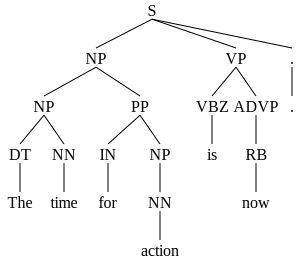

In [46]:
!pip install svgling
from nltk.tree import Tree

example_sentence = df[['constituency_tree', 'dependency_tree']].iloc[0]
cons_tree = Tree.fromstring(example_sentence[0])
cons_tree

In [47]:
dep_tree = example_sentence[1]
print(dep_tree)

{i’v: {'relation': 'compound', 'head': 'purchas', 'children': '[]'}, purchas: {'relation': 'compound', 'head': 'razer', 'children': '[i’v]'}, mani: {'relation': 'compound', 'head': 'razer', 'children': '[]'}, razer: {'relation': 'compound', 'head': 'razer', 'children': '[purchas, mani]'}, product: {'relation': 'nmod', 'head': 'razer', 'children': '[]'}, experi: {'relation': 'compound', 'head': 'razer', 'children': '[]'}, razer: {'relation': 'compound', 'head': 'product', 'children': '[razer, product, experi]'}, everi: {'relation': 'nmod', 'head': 'product', 'children': '[]'}, singl: {'relation': 'amod', 'head': 'product', 'children': '[]'}, product: {'relation': 'nsubj', 'head': 'eventu', 'children': '[razer, everi, singl, sort, problem]'}, i: {'relation': 'nsubj', 'head': 'sort', 'children': '[]'}, sort: {'relation': 'relcl', 'head': 'product', 'children': '[i]'}, fatal: {'relation': 'amod', 'head': 'problem', 'children': '[]'}, problem: {'relation': 'appos', 'head': 'product', 'child

In [48]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

entity_count = {
    'person_names' : 0,
    'organizations' : 0,
    'locations' : 0,
    'product_names' : 0,
    'date' : 0
}

def ner_recognition(s):
  text = NER(s)
  for word in text.ents:
    if(word.label_ == 'PERSON'):
      entity_count['person_names'] += 1
    if(word.label_ == 'ORG'):
      entity_count['organizations'] += 1
    if(word.label_ == 'LOC'):
      entity_count['locations'] += 1
    if(word.label_ == 'PRODUCT'):
      entity_count['product_names'] += 1
    if(word.label_ == 'DATE'):
      entity_count['date'] += 1


df['cleaned_data'].apply(lambda x: ' '.join(x)).apply(ner_recognition)
print(entity_count)

{'person_names': 70, 'organizations': 35, 'locations': 0, 'product_names': 7, 'date': 14}


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [49]:
# Write your response below
# The web scraping was the challenge I have faced while doing this assignment. For web scraping we need to understand the HTML lines to get the proper data
# in return. And cleaning data was a bit challenging as it requires to implement proper functions to achieve the desired output.